In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D


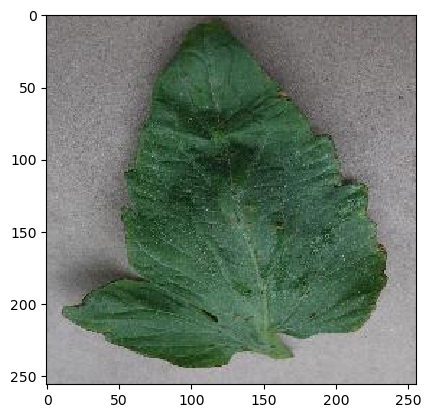

In [29]:
img =  image.load_img('/home/edwin/Desktop/VSpython/tomato/train/Tomato___Bacterial_spot/40860ca0-2ec2-43be-817d-ef19ae1c10af___GCREC_Bact.Sp 6097.JPG')
plt.imshow(img)

In [30]:
train =ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [31]:
train_dataset = train.flow_from_directory('/home/edwin/Desktop/VSpython/tomato/train',
                                          target_size= (200, 200),
                                          batch_size = 64, class_mode = 'binary')

validation_dataset = train.flow_from_directory('/home/edwin/Desktop/VSpython/tomato/val',
                                          target_size= (200, 200),
                                          batch_size = 64, class_mode = 'binary')

Found 5000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [32]:
train_dataset.class_indices
validation_dataset.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Tomato_mosaic_virus': 3,
 'Tomato___healthy': 4}

In [33]:
train_labels = train_dataset.classes
train_labels

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [34]:
val_labels =validation_dataset.classes
val_labels.size

500

In [35]:
#define ur model
model = Sequential([
    Conv2D(16, (3,3), activation  = 'relu', input_shape = (200, 200, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation  = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [36]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )

Epoch 1/3
79/79 [==============================] - 46s 547ms/step - loss: -290337.0000 - accuracy: 0.2000 - val_loss: -1838412.2500 - val_accuracy: 0.2000
Epoch 2/3
79/79 [==============================] - 46s 570ms/step - loss: -16229774.0000 - accuracy: 0.2000 - val_loss: -49626168.0000 - val_accuracy: 0.2000
Epoch 3/3
79/79 [==============================] - 62s 782ms/step - loss: -148331760.0000 - accuracy: 0.2000 - val_loss: -325617408.0000 - val_accuracy: 0.2000


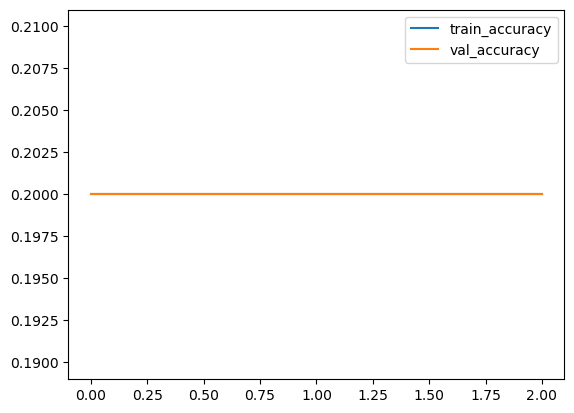

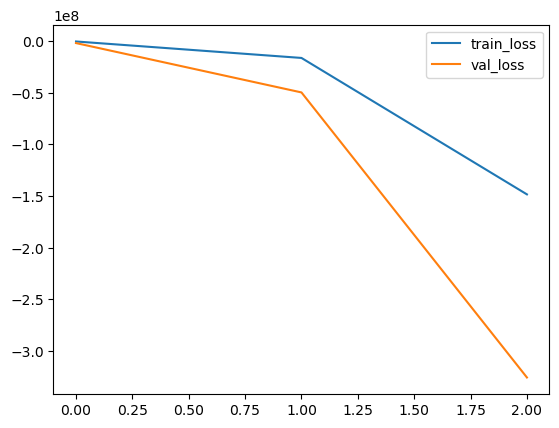

In [37]:
history= model.fit(train_dataset,  epochs= 3,validation_data=validation_dataset )

# Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [38]:
model.evaluate(validation_dataset)

8/8 [==============================] - 2s 107ms/step - loss: -325617440.0000 - accuracy: 0.2000


[-325617440.0, 0.20000000298023224]

In [39]:
class_labels = {v: k for k, v in train_dataset.class_indices.items()}
print(class_labels)

{0: 'Tomato___Bacterial_spot', 1: 'Tomato___Early_blight', 2: 'Tomato___Late_blight', 3: 'Tomato___Tomato_mosaic_virus', 4: 'Tomato___healthy'}


1/1 [==============================] - 0s 19ms/step
[[1.]]
1/1 [==============================] - 0s 18ms/step
This might be  Tomato___Bacterial_spot


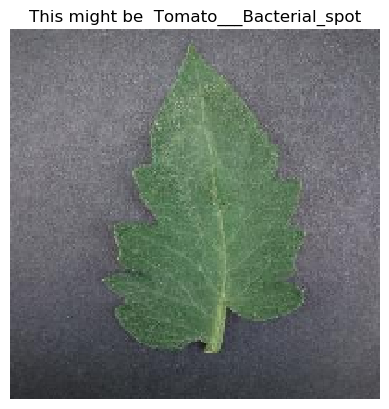

In [102]:
test_dir_path = '/home/edwin/Desktop/VSpython/tomato/val/Tomato___healthy'
import os
import random
images  = os.listdir(test_dir_path)
random_image = random.choice(images)
image_path = os.path.join(test_dir_path, random_image)

img = image.load_img(image_path, target_size=(200, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)
print(prediction)


prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)  # Get the index of the highest predicted probability

text = (f"This might be  {class_labels[predicted_class]}")
print(text)
# Display the image with the prediction
plt.imshow(img)
plt.title(text)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 18ms/step
[[1.]]
1/1 [==============================] - 0s 21ms/step
This might be  Tomato___Bacterial_spot


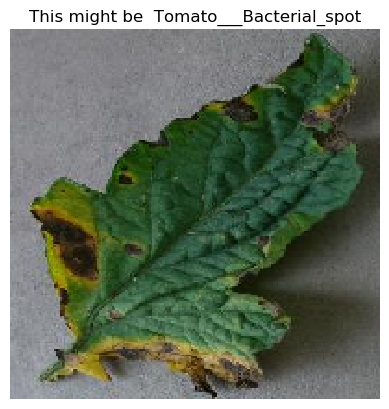

In [ ]:
# test_dir_path = '/home/edwin/Desktop/VSpython/tomato/Test'
# import os
# import random
# images  = os.listdir(test_dir_path)
# random_image = random.choice(images)
# image_path = os.path.join(test_dir_path, random_image)

# img = image.load_img(image_path, target_size=(200, 200))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# prediction = model.predict(img_array)
# print(prediction)


# prediction = model.predict(img_array)
# predicted_class = np.argmax(prediction)  # Get the index of the highest predicted probability

# text = (f"This might be  {class_labels[predicted_class]}")
# print(text)
# # Display the image with the prediction
# plt.imshow(img)
# plt.title(text)
# plt.axis('off')
# plt.show()